In [1]:
#import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
#load in cognitive data scores

#cog_data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS1_merged.csv")
#cog_data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS2_merged.csv")
cog_data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS1_merged.csv")
cog_data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS2_merged.csv")

In [3]:
cog_data_arms1.head()

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,1
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,2
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,3


In [4]:
cog_data_arms2.head()

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,88.0,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,1
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,78.0,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,6
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,83.0,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,1
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,97.0,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,6
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,116.0,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,7


In [5]:
cog_data_arms1.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_yea

In [6]:
cog_data_arms2.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_yea

In [7]:
#convert sex variable to numerical dummy
#cog_data_arms1_dummies = pd.get_dummies(cog_data_arms1, columns=['sex.baseline_year_1_arm_1.x'])
#cog_data_arms1_dummies.head()
#cog_data_arms1_dummies.dtypes

In [8]:
value_counts_arms1 = cog_data_arms1['community'].value_counts()
print(value_counts_arms1)

community
1     920
2     537
3     500
4     274
5     256
6     244
7     235
8     183
9     123
10      8
Name: count, dtype: int64


In [9]:
value_counts_arms2 = cog_data_arms2['community'].value_counts()
print(value_counts_arms2)

community
1    871
2    637
3    426
4    417
5    358
6    278
7    107
8     82
9      3
Name: count, dtype: int64


In [10]:
def remove_small_communities(df, community_column, threshold=100):
    community_counts = df[community_column].value_counts()
    mask = df[community_column].isin(community_counts[community_counts >= threshold].index)
    filtered_df = df[mask]
    return filtered_df

cog_data_arms1_filtered = remove_small_communities(cog_data_arms1, 'community')
value_counts_arms1 = cog_data_arms1_filtered['community'].value_counts()
print(value_counts_arms1)

cog_data_arms2_filtered = remove_small_communities(cog_data_arms2, 'community')
value_counts_arms2 = cog_data_arms2_filtered['community'].value_counts()
print(value_counts_arms2)

community
1    920
2    537
3    500
4    274
5    256
6    244
7    235
8    183
9    123
Name: count, dtype: int64
community
1    871
2    637
3    426
4    417
5    358
6    278
7    107
Name: count, dtype: int64


In [11]:
cog_data_arms1_filtered.head()

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,1
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,2
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,3


In [12]:
cog_data_arms2_filtered.head()

,src_subject_id.baseline_year_1_arm_1.x,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,88.0,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,1
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,78.0,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,6
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,83.0,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,1
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,97.0,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,6
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,116.0,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,7


# *xg boost within list/fluid arms1*

In [83]:
#define target variable
y_arms1 = cog_data_arms1_filtered['community'] - 1 #y may need to be subtracted by 1 to avoid indexing error?

#define predictor variables, drop tempermant metrics
X_arms1 = cog_data_arms1_filtered.drop(['community',
                         #'src_subject_id.baseline_year_1_arm_1.x',
                         'X',
                         'dataset_id.baseline_year_1_arm_1.x',
                         'interview_age.baseline_year_1_arm_1.x',
                         'sex.baseline_year_1_arm_1.x',
                         #'bis_y_ss_bas_rr.baseline_year_1_arm_1','bis_y_ss_bas_drive.baseline_year_1_arm_1','bis_y_ss_bas_fs.baseline_year_1_arm_1',
                         #'bis_y_ss_bis_sum.baseline_year_1_arm_1','upps_y_ss_negative_urgency.baseline_year_1_arm_1',
                         #'upps_y_ss_positive_urgency.baseline_year_1_arm_1','upps_y_ss_lack_of_planning.baseline_year_1_arm_1',
                         #'upps_y_ss_sensation_seeking.baseline_year_1_arm_1','upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1',
                         'nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1'], axis = 1)

y_arms1.value_counts()

community
0    920
1    537
2    500
3    274
4    256
5    244
6    235
7    183
8    123
Name: count, dtype: int64

In [25]:
X_arms1.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_year_1_arm_1         int64
nihtbx_list_agecorrected.baseline_year_1_arm_1            int64
nihtbx_cardsort_agecorrected.baseline_year_1_arm_1        int64
nihtbx_pattern_agecorrected.baseline_year_1_arm_1         int64
nihtbx_picture_agecorrected.baseline_year_1_arm_1         int64
nihtbx_reading_agecorrected.baseline_yea

In [26]:
X_arms1.head()

,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,9,2,6,2,10,7,11,7,10,122,101,100,86,103,106,81,102.0,99.0
1,5,1,1,6,6,8,11,6,10,122,92,107,103,95,119,110,119.0,114.0
2,6,2,5,11,8,8,7,11,6,98,116,145,90,117,116,85,90.0,110.0
3,13,4,7,4,12,11,12,6,7,92,74,93,94,103,99,110,101.0,93.0
4,12,3,6,2,5,4,6,11,5,98,88,82,81,56,116,85,90.0,79.0


In [27]:
#split data into train and test 75/25
#consider stratifying by site
#this is where the loop will start
X_train_arms1, X_test_arms1, y_train_arms1, y_test_arms1 = train_test_split(X_arms1, y_arms1, test_size = 0.25, random_state = 0)

In [28]:
#define custom scorers with appropriate 'average' parameter
precision_scorer = make_scorer(precision_score, average='micro')
recall_scorer = make_scorer(recall_score, average='micro')
f1_scorer = make_scorer(f1_score, average='micro')

In [29]:
#setting XGBoost to do multiclass classification using the softprob objective. From XGBoost documentation: 
# "same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata * nclass matrix. 
# The result contains predicted probability of each data point belonging to each class."
xgb_arms1 = XGBClassifier(objective='multi:softprob', random_state=0, num_class=9)

In [30]:
#defining parameters for tuning as cv_params

cv_params = {'max_depth': [4, 6], # the maximum depth of each decision tree within the XGBoost model. Tuning process will try trees with max depth of 4 and 6. Deeper trees can capture more complex patters but prone to overfitting
              'min_child_weight': [3, 5], # the minimum sum of instance weight needed in a child node to continue splitting. higher values can help prevent overfitting by pruning more branches from decision trees 
              'learning_rate': [0.1, 0.2, 0.3], # the step size shrinkage used in each boosting iteration. lower values tend to require more trees (iterations) but can improve the models performance
              'n_estimators': [5,10,15], # specifies the number of decision trees to be built. more trees = capture more complex patterns, too many trees = overfitting
              'subsample': [0.7], # during tuning, 70% of training instances (rows) will be randomly sampled for growing each tree. can help reduce overfitting
              'colsample_bytree': [0.7] # during tuning, 70% of freatures (columns) will be randomly sampled for growing each tree. can help reduce overfitting
              }

In [31]:
#defining evaluation criteria as scoring
scoring = {
    'accuracy': 'accuracy', 
    'precision': precision_scorer,
    'recall': recall_scorer, 
    'f1': f1_scorer
}
#accuracy = number of correct predictions / total number of predictions
#precision = #measures the proportion of true positives among both the true and false positives (predicted positives)
#recall = #measures the proportion of true positives among the relevant elements (true positives & false negatives)
#f1 = gives more weight to false negatives and false positives. 2 * precision * recall / precision + recall

In [32]:
#utilizing GridSearchCV to find optimal parameter values
xgb_cv_arms1 = GridSearchCV(xgb_arms1, cv_params, scoring = scoring, 
                      cv = 10, 
                      refit = 'f1')

In [33]:
#fitting gridsearch model optimal params to training data
#TODO: iterate 100 times, calculate a confidence interval for accuracy metric that results each time, calculate p value
#reshuffle predicted labels
xgb_cv_arms1 = xgb_cv_arms1.fit(X_train_arms1, y_train_arms1)
xgb_cv_arms1

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict', average=micro),
                      'precision': make_scorer(precision_score, response_method='predict', average=micro),
                      'recall': make_scorer(recall_score, response_method='predict', average=micro)})

In [34]:
xgb_cv_arms1.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [35]:
pickle.dump(xgb_cv_arms1, open('xgb_cv_overfit_micro_fluid_arms1.sav', 'wb'))

In [36]:
y_pred_arms1 = xgb_cv_arms1.predict(X_test_arms1)

In [37]:
ac_score_arms1 = metrics.accuracy_score(y_test_arms1, y_pred_arms1)
print('accuracy score:', ac_score_arms1)

accuracy score: 0.988997555012225


In [38]:
pc_score_arms1 = precision_score(y_test_arms1, y_pred_arms1, average='macro')
print('precision score:', pc_score_arms1)

precision score: 0.9878205208440396


In [39]:
rc_score_arms1 = metrics.recall_score(y_test_arms1, y_pred_arms1, average='micro')
print('recall score:', rc_score_arms1)

recall score: 0.988997555012225


In [40]:
f1_score_arms1 = metrics.f1_score(y_test_arms1, y_pred_arms1, average='micro')
print('f1 score:', f1_score_arms1)

f1 score: 0.988997555012225


In [41]:
# the accuracy of this model was 98.9% accurate
# the model shows a precision score of 0.989, indicating that the model is very good at predicting true positives
# this means that the model correctly classifies which community a participant belongs to based off of cognitive profiles
# the recall score is 0.989 and the f1 score is 0.989

In [42]:
cm_arms1 = metrics.confusion_matrix(y_test_arms1, y_pred_arms1)

In [43]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_arms1, display_labels=xgb_cv_arms1.classes_)

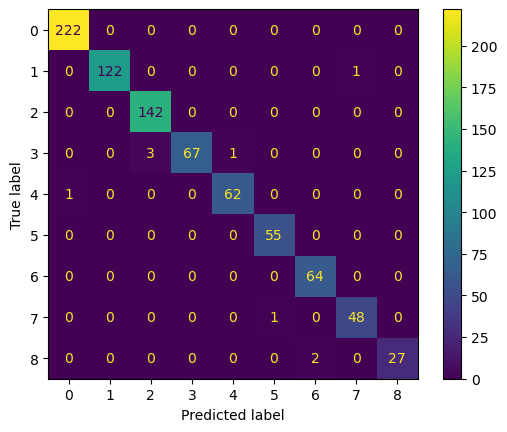

In [44]:
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

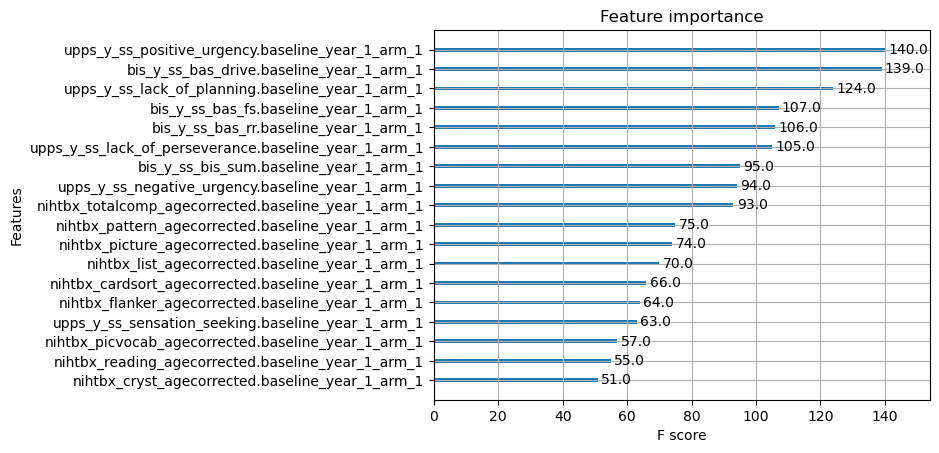

In [45]:
plot_importance(xgb_cv_arms1.best_estimator_)

# *xg boost within list/fluid arms2*

In [69]:
#define target variable
y_arms2 = cog_data_arms2_filtered['community'] - 1 #y may need to be subtracted by 1 to avoid error?

#define predictor variables, drop tempermant metrics
X_arms2 = cog_data_arms2_filtered.drop(['community',
                         #'src_subject_id.baseline_year_1_arm_1.x',
                         'X',
                         'dataset_id.baseline_year_1_arm_1.x',
                         'interview_age.baseline_year_1_arm_1.x',
                         'sex.baseline_year_1_arm_1.x',
                         #'bis_y_ss_bas_rr.baseline_year_1_arm_1','bis_y_ss_bas_drive.baseline_year_1_arm_1','bis_y_ss_bas_fs.baseline_year_1_arm_1',
                         #'bis_y_ss_bis_sum.baseline_year_1_arm_1','upps_y_ss_negative_urgency.baseline_year_1_arm_1',
                         #'upps_y_ss_positive_urgency.baseline_year_1_arm_1','upps_y_ss_lack_of_planning.baseline_year_1_arm_1',
                         #'upps_y_ss_sensation_seeking.baseline_year_1_arm_1','upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1',
                         'nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1'], axis = 1)

y_arms2.value_counts()

community
0    871
1    637
2    426
3    417
4    358
5    278
6    107
Name: count, dtype: int64

In [70]:
X_arms2.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_year_1_arm_1       float64
nihtbx_list_agecorrected.baseline_year_1_arm_1          float64
nihtbx_cardsort_agecorrected.baseline_year_1_arm_1      float64
nihtbx_pattern_agecorrected.baseline_year_1_arm_1       float64
nihtbx_picture_agecorrected.baseline_yea

In [48]:
X_arms2.head()

,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,12,9,3,8,9,9,9,13,9,120.0,88.0,110.0,100.0,91.0,130.0,118.0,122.0,116.0
1,7,3,3,8,6,5,7,13,8,131.0,78.0,89.0,90.0,82.0,81.0,107.0,122.0,98.0
2,15,6,12,10,12,11,8,15,6,153.0,83.0,107.0,103.0,70.0,92.0,120.0,142.0,116.0
3,13,0,3,12,6,4,6,14,6,109.0,97.0,110.0,100.0,82.0,95.0,96.0,103.0,98.0
4,11,3,10,11,11,8,9,15,6,120.0,116.0,96.0,109.0,73.0,95.0,96.0,110.0,103.0


In [49]:
#split data into train and test 75/25
#consider stratifying by site
#this is where the loop will start
X_train_arms2, X_test_arms2, y_train_arms2, y_test_arms2 = train_test_split(X_arms2, y_arms2, test_size = 0.25, random_state = 0)

In [50]:
#define custom scorers with appropriate 'average' parameter
precision_scorer = make_scorer(precision_score, average='micro')
recall_scorer = make_scorer(recall_score, average='micro')
f1_scorer = make_scorer(f1_score, average='micro')

In [51]:
#setting XGBoost to do multiclass classification using the softprob objective. From XGBoost documentation: 
# "same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata * nclass matrix. 
# The result contains predicted probability of each data point belonging to each class."
xgb_arms2 = XGBClassifier(objective='multi:softprob', random_state=0, num_class=9)

In [52]:
#defining parameters for tuning as cv_params

cv_params = {'max_depth': [4, 6], # the maximum depth of each decision tree within the XGBoost model. Tuning process will try trees with max depth of 4 and 6. Deeper trees can capture more complex patters but prone to overfitting
              'min_child_weight': [3, 5], # the minimum sum of instance weight needed in a child node to continue splitting. higher values can help prevent overfitting by pruning more branches from decision trees 
              'learning_rate': [0.1, 0.2, 0.3], # the step size shrinkage used in each boosting iteration. lower values tend to require more trees (iterations) but can improve the models performance
              'n_estimators': [5,10,15], # specifies the number of decision trees to be built. more trees = capture more complex patterns, too many trees = overfitting
              'subsample': [0.7], # during tuning, 70% of training instances (rows) will be randomly sampled for growing each tree. can help reduce overfitting
              'colsample_bytree': [0.7] # during tuning, 70% of freatures (columns) will be randomly sampled for growing each tree. can help reduce overfitting
              }

In [53]:
#defining evaluation criteria as scoring
scoring = {
    'accuracy': 'accuracy', 
    'precision': precision_scorer,
    'recall': recall_scorer, 
    'f1': f1_scorer
}
#accuracy = number of correct predictions / total number of predictions
#precision = #measures the proportion of true positives among both the true and false positives (predicted positives)
#recall = #measures the proportion of true positives among the relevant elements (true positives & false negatives)
#f1 = gives more weight to false negatives and false positives. 2 * precision * recall / precision + recall

In [54]:
#utilizing GridSearchCV to find optimal parameter values
xgb_cv_arms2 = GridSearchCV(xgb_arms2, cv_params, scoring = scoring, 
                      cv = 10, 
                      refit = 'f1')

In [55]:
#fitting gridsearch model optimal params to training data
#TODO: iterate 100 times, calculate a confidence interval for accuracy metric that results each time, calculate p value
#reshuffle predicted labels
xgb_cv_arms2 = xgb_cv_arms2.fit(X_train_arms2, y_train_arms2)
xgb_cv_arms2

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy',
                      'f1': make_scorer(f1_score, response_method='predict', average=micro),
                      'precision': make_scorer(precision_score, response_method='predict', average=micro),
                      'recall': make_scorer(recall_score, response_method='predict', average=micro)})

In [56]:
xgb_cv_arms2.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 15,
 'subsample': 0.7}

In [57]:
pickle.dump(xgb_cv_arms2, open('xgb_cv_overfit_micro_fluid_arms2.sav', 'wb'))

In [58]:
y_pred_arms2 = xgb_cv_arms2.predict(X_test_arms2)

In [59]:
ac_score_arms2 = metrics.accuracy_score(y_test_arms2, y_pred_arms2)
print('accuracy score:', ac_score_arms2)

accuracy score: 0.9832041343669251


In [60]:
pc_score_arms2 = precision_score(y_test_arms2, y_pred_arms2, average='micro')
print('precision score:', pc_score_arms2)

precision score: 0.9832041343669251


In [61]:
rc_score_arms2 = metrics.recall_score(y_test_arms2, y_pred_arms2, average='micro')
print('recall score:', rc_score_arms2)

recall score: 0.9832041343669251


In [62]:
f1_score_arms2 = metrics.f1_score(y_test_arms2, y_pred_arms2, average='micro')
print('f1 score:', f1_score_arms2)

f1 score: 0.9832041343669251


In [63]:
cm_arms2 = metrics.confusion_matrix(y_test_arms2, y_pred_arms2)

In [64]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_arms2, display_labels=xgb_cv_arms2.classes_)

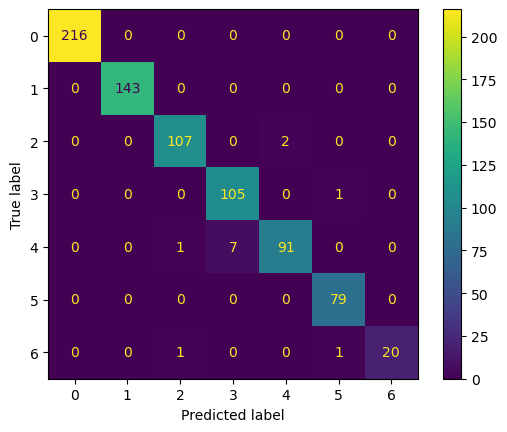

In [65]:
disp.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

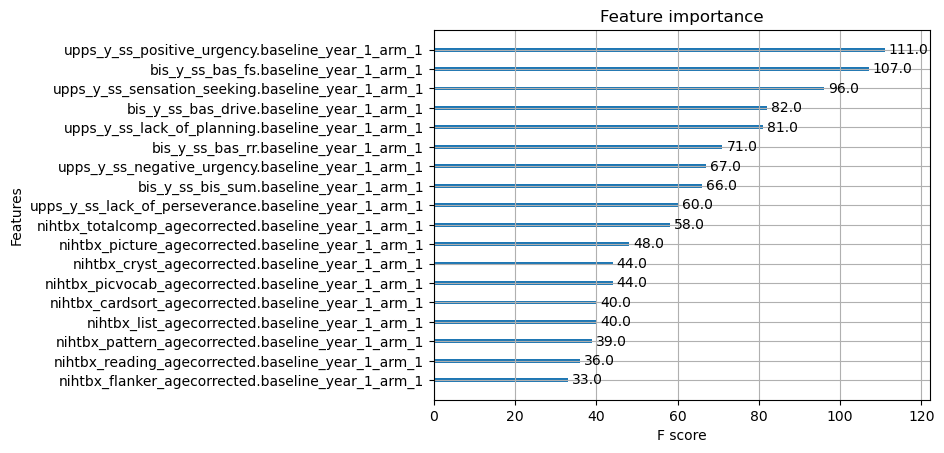

In [66]:
plot_importance(xgb_cv_arms2.best_estimator_)

# *xg boost for list/fluid across the arms, using arms1 overfit model to predict arms2*

In [67]:
#using the best fit model from arms1, predict on test data from arms2, and vice versa
#use all the arms2 to data when evaluating the prediction
#after assigning arms2 data to arms1 subtypes, see if they are similar across measures of adhd, cognition, and temperament to the original arms1 data groups

In [71]:
all_arms2_with_arms1_model = xgb_cv_arms1.predict(X_arms2.drop('src_subject_id.baseline_year_1_arm_1.x', axis=1))
all_arms2_with_arms1_model

array([6, 0, 1, ..., 6, 1, 0])

In [72]:
arms2_data_with_arms1_predictions = X_arms2.assign(community=all_arms2_with_arms1_model)
arms2_data_with_arms1_predictions
#id_predictions = dict(zip(arms2_data_with_arms1_predictions['src_subject_id.baseline_year_1_arm_1.x'], arms2_data_with_arms1_predictions['community']))


,src_subject_id.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,12,9,3,8,9,9,9,13,9,120.0,88.0,110.0,100.0,91.0,130.0,118.0,122.0,116.0,6
1,NDAR_INV00NPMHND,7,3,3,8,6,5,7,13,8,131.0,78.0,89.0,90.0,82.0,81.0,107.0,122.0,98.0,0
2,NDAR_INV01NAYMZH,15,6,12,10,12,11,8,15,6,153.0,83.0,107.0,103.0,70.0,92.0,120.0,142.0,116.0,1
3,NDAR_INV021403LF,13,0,3,12,6,4,6,14,6,109.0,97.0,110.0,100.0,82.0,95.0,96.0,103.0,98.0,2
4,NDAR_INV022ZVCT8,11,3,10,11,11,8,9,15,6,120.0,116.0,96.0,109.0,73.0,95.0,96.0,110.0,103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,NDAR_INVZZ35KHXP,12,8,6,7,8,7,5,7,7,87.0,97.0,110.0,90.0,91.0,88.0,96.0,90.0,89.0,8
3174,NDAR_INVZZ3P1ZFJ,11,3,9,7,14,15,4,11,8,77.0,88.0,82.0,72.0,21.0,67.0,75.0,71.0,49.0,7
3175,NDAR_INVZZ6ZJ2KY,12,12,6,5,8,13,15,8,6,112.0,101.0,80.0,112.0,136.0,92.0,100.0,107.0,108.0,6
3176,NDAR_INVZZ81LEEV,14,5,8,10,11,13,8,12,5,98.0,97.0,110.0,81.0,91.0,88.0,96.0,97.0,91.0,1


In [73]:
arms2_data_with_arms1_predictions_renamed = arms2_data_with_arms1_predictions.rename(
    columns={'src_subject_id.baseline_year_1_arm_1.x': 'subject_id'})
arms2_data_with_arms1_predictions_renamed

,subject_id,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,12,9,3,8,9,9,9,13,9,120.0,88.0,110.0,100.0,91.0,130.0,118.0,122.0,116.0,6
1,NDAR_INV00NPMHND,7,3,3,8,6,5,7,13,8,131.0,78.0,89.0,90.0,82.0,81.0,107.0,122.0,98.0,0
2,NDAR_INV01NAYMZH,15,6,12,10,12,11,8,15,6,153.0,83.0,107.0,103.0,70.0,92.0,120.0,142.0,116.0,1
3,NDAR_INV021403LF,13,0,3,12,6,4,6,14,6,109.0,97.0,110.0,100.0,82.0,95.0,96.0,103.0,98.0,2
4,NDAR_INV022ZVCT8,11,3,10,11,11,8,9,15,6,120.0,116.0,96.0,109.0,73.0,95.0,96.0,110.0,103.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,NDAR_INVZZ35KHXP,12,8,6,7,8,7,5,7,7,87.0,97.0,110.0,90.0,91.0,88.0,96.0,90.0,89.0,8
3174,NDAR_INVZZ3P1ZFJ,11,3,9,7,14,15,4,11,8,77.0,88.0,82.0,72.0,21.0,67.0,75.0,71.0,49.0,7
3175,NDAR_INVZZ6ZJ2KY,12,12,6,5,8,13,15,8,6,112.0,101.0,80.0,112.0,136.0,92.0,100.0,107.0,108.0,6
3176,NDAR_INVZZ81LEEV,14,5,8,10,11,13,8,12,5,98.0,97.0,110.0,81.0,91.0,88.0,96.0,97.0,91.0,1


In [74]:
arms2_data_with_arms1_predictions_renamed[['subject_id', 'community']].to_csv('id_predictions_fluid_ARMS2.csv', index=False)

In [75]:
id_predictions_df_arms2 = pd.read_csv('id_predictions_fluid_ARMS2.csv')
id_predictions_df_arms2
#cm_arms1_arms2 = metrics.confusion_matrix(y_test_arms1, y_pred_arms2_with_arms1_model)

,subject_id,community
0,NDAR_INV00J52GPG,6
1,NDAR_INV00NPMHND,0
2,NDAR_INV01NAYMZH,1
3,NDAR_INV021403LF,2
4,NDAR_INV022ZVCT8,0
...,...,...
3089,NDAR_INVZZ35KHXP,8
3090,NDAR_INVZZ3P1ZFJ,7
3091,NDAR_INVZZ6ZJ2KY,6
3092,NDAR_INVZZ81LEEV,1


In [76]:
cog_data_arms2_renamed = cog_data_arms2.rename(
    columns={'src_subject_id.baseline_year_1_arm_1.x': 'subject_id'})
cog_data_arms2_renamed

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,88.0,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,1
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,78.0,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,6
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,83.0,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,1
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,97.0,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,6
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,116.0,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,88.0,82.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,3
3175,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,101.0,80.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,1
3176,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,97.0,110.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,3
3177,NDAR_INVZZJ3A7BK,11868,47437,122,F,10,1,8,13,15,...,101.0,140.0,112.0,119.0,99.0,90.0,123.0,101.0,114.0,8


In [77]:
merged_arms2_cogdata_arms1_xgbmodel_pred = pd.merge(
    left=cog_data_arms2_renamed,
    right=id_predictions_df_arms2,
    how='left',
    left_on='subject_id',
    right_on='subject_id',
    suffixes=('_left', '_right')
)
merged_arms2_cogdata_arms1_xgbmodel_pred

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community_left,community_right
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,1,6.0
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,6,0.0
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,1,1.0
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,6,2.0
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,82.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,3,7.0
3175,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,80.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,1,6.0
3176,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,110.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,3,1.0
3177,NDAR_INVZZJ3A7BK,11868,47437,122,F,10,1,8,13,15,...,140.0,112.0,119.0,99.0,90.0,123.0,101.0,114.0,8,NaN


In [78]:
merged_arms2_cogdata_arms1_xgbmodel_pred = merged_arms2_cogdata_arms1_xgbmodel_pred[merged_arms2_cogdata_arms1_xgbmodel_pred['community_right'].notna()]
merged_arms2_cogdata_arms1_xgbmodel_pred

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community_left,community_right
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,1,6.0
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,6,0.0
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,1,1.0
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,6,2.0
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,NDAR_INVZZ35KHXP,11862,47437,109,M,12,8,6,7,8,...,110.0,90.0,91.0,88.0,96.0,92.0,90.0,89.0,1,8.0
3174,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,82.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,3,7.0
3175,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,80.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,1,6.0
3176,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,110.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,3,1.0


In [79]:
merged_arms2_cogdata_arms1_xgbmodel_pred.loc[:, 'community'] = merged_arms2_cogdata_arms1_xgbmodel_pred['community_right'].combine_first(merged_arms2_cogdata_arms1_xgbmodel_pred['community_left'])
merged_arms2_cogdata_arms1_xgbmodel_pred = merged_arms2_cogdata_arms1_xgbmodel_pred.drop(['community_left', 'community_right'], axis=1)
merged_arms2_cogdata_arms1_xgbmodel_pred

/tmp/ipykernel_3980942/441402813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_arms2_cogdata_arms1_xgbmodel_pred.loc[:, 'community'] = merged_arms2_cogdata_arms1_xgbmodel_pred['community_right'].combine_first(merged_arms2_cogdata_arms1_xgbmodel_pred['community_left'])


,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,88.0,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,6.0
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,78.0,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,0.0
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,83.0,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,1.0
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,97.0,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,2.0
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,116.0,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,NDAR_INVZZ35KHXP,11862,47437,109,M,12,8,6,7,8,...,97.0,110.0,90.0,91.0,88.0,96.0,92.0,90.0,89.0,8.0
3174,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,88.0,82.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,7.0
3175,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,101.0,80.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,6.0
3176,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,97.0,110.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,1.0


In [80]:
merged_arms2_cogdata_arms1_xgbmodel_pred['community'] = merged_arms2_cogdata_arms1_xgbmodel_pred['community'].apply(lambda x: int(x) + 1)
merged_arms2_cogdata_arms1_xgbmodel_pred

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,88.0,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,7
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,78.0,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,1
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,83.0,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,2
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,97.0,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,3
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,116.0,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,NDAR_INVZZ35KHXP,11862,47437,109,M,12,8,6,7,8,...,97.0,110.0,90.0,91.0,88.0,96.0,92.0,90.0,89.0,9
3174,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,88.0,82.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,8
3175,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,101.0,80.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,7
3176,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,97.0,110.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,2


In [81]:
value_counts_pred_arms2 = merged_arms2_cogdata_arms1_xgbmodel_pred['community'].value_counts()
print(value_counts_pred_arms2)

community
1    829
2    555
3    461
5    249
6    245
7    232
8    202
4    190
9    131
Name: count, dtype: int64


In [82]:
merged_arms2_cogdata_arms1_xgbmodel_pred.to_csv('fluid_arms2_cog_data_with_arms1_xgb_model.csv', index=False)
merged_arms2_cogdata_arms1_xgbmodel_pred
#stop here for now

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV00J52GPG,7,47437,110,M,12,9,3,8,9,...,88.0,110.0,100.0,91.0,130.0,118.0,105.0,122.0,116.0,7
1,NDAR_INV00NPMHND,10,47437,118,F,7,3,3,8,6,...,78.0,89.0,90.0,82.0,81.0,107.0,74.0,122.0,98.0,1
2,NDAR_INV01NAYMZH,24,47437,129,M,15,6,12,10,12,...,83.0,107.0,103.0,70.0,92.0,120.0,85.0,142.0,116.0,2
3,NDAR_INV021403LF,28,47437,109,M,13,0,3,12,6,...,97.0,110.0,100.0,82.0,95.0,96.0,94.0,103.0,98.0,3
4,NDAR_INV022ZVCT8,30,47437,116,F,11,3,10,11,11,...,116.0,96.0,109.0,73.0,95.0,96.0,96.0,110.0,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,NDAR_INVZZ35KHXP,11862,47437,109,M,12,8,6,7,8,...,97.0,110.0,90.0,91.0,88.0,96.0,92.0,90.0,89.0,9
3174,NDAR_INVZZ3P1ZFJ,11863,47437,115,M,11,3,9,7,14,...,88.0,82.0,72.0,21.0,67.0,75.0,45.0,71.0,49.0,8
3175,NDAR_INVZZ6ZJ2KY,11865,47437,124,F,12,12,6,5,8,...,101.0,80.0,112.0,136.0,92.0,100.0,106.0,107.0,108.0,7
3176,NDAR_INVZZ81LEEV,11866,47437,108,M,14,5,8,10,11,...,97.0,110.0,81.0,91.0,88.0,96.0,89.0,97.0,91.0,2


In [59]:
#ac_score_arms2_with_arms1_model = metrics.accuracy_score(y_test_arms2, y_pred_arms2_with_arms1_model)
#print('accuracy score:', ac_score_arms2_with_arms1_model)

accuracy score: 0.10327455919395466


In [60]:
#pc_score_arms2_with_arms1_model = precision_score(y_test_arms2, y_pred_arms2_with_arms1_model, average='micro')
#print('precision score:', pc_score_arms2_with_arms1_model)

precision score: 0.10327455919395466


In [61]:
#rc_score_arms2_with_arms1_model = metrics.recall_score(y_test_arms2, y_pred_arms2_with_arms1_model, average='micro')
#print('recall score:', rc_score_arms2_with_arms1_model)

recall score: 0.10327455919395466


In [62]:
#f1_score_arms2_with_arms1_model = metrics.f1_score(y_test_arms2, y_pred_arms2_with_arms1_model, average='micro')
#print('f1 score:', f1_score_arms2_with_arms1_model)

f1 score: 0.10327455919395466


In [63]:
cm_arms2_with_arms1_model = metrics.confusion_matrix(y_test_arms2, y_pred_arms2_with_arms1_model)

In [66]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_arms2_with_arms1_model, display_labels=xgb_cv_arms1.classes_)

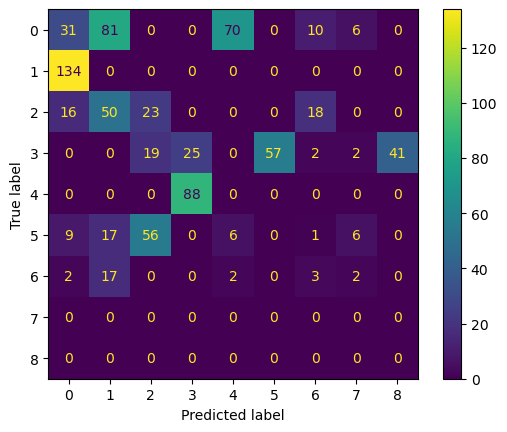

In [67]:
disp.plot()

In [ ]:
#plot_importance(xgb_cv_arms2.best_estimator_)

# *xg boost for list/fluid across the arms, using arms2 overfit model to predict arms1*

In [84]:
all_arms1_with_arms2_model = xgb_cv_arms2.predict(X_arms1.drop('src_subject_id.baseline_year_1_arm_1.x', axis=1))
#all_arms1_with_arms2_model = xgb_cv_arms2.predict(X_arms1)
all_arms1_with_arms2_model

array([3, 3, 4, ..., 1, 0, 2])

In [85]:
arms1_data_with_arms2_predictions = X_arms1.assign(community=all_arms1_with_arms2_model)
arms1_data_with_arms2_predictions

,src_subject_id.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,9,2,6,2,10,7,11,7,10,122,101,100,86,103,106,81,102.0,99.0,3
1,NDAR_INV007W6H7B,5,1,1,6,6,8,11,6,10,122,92,107,103,95,119,110,119.0,114.0,3
2,NDAR_INV00BD7VDC,6,2,5,11,8,8,7,11,6,98,116,145,90,117,116,85,90.0,110.0,4
3,NDAR_INV00HEV6HB,13,4,7,4,12,11,12,6,7,92,74,93,94,103,99,110,101.0,93.0,2
4,NDAR_INV00LH735Y,12,3,6,2,5,4,6,11,5,98,88,82,81,56,116,85,90.0,79.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,10,5,5,6,8,8,5,12,5,122,110,107,94,144,106,110,119.0,123.0,4
3276,NDAR_INVZWP0XZ9A,11,7,4,7,12,11,12,13,8,98,107,110,109,99,95,107,103.0,105.0,0
3277,NDAR_INVZYC44GB8,5,2,2,4,4,5,8,10,7,112,119,100,94,103,65,110,113.0,104.0,1
3278,NDAR_INVZZFG6J5U,15,10,5,14,10,11,8,9,5,102,101,80,94,95,79,90,96.0,87.0,0


In [86]:
arms1_data_with_arms2_predictions_renamed = arms1_data_with_arms2_predictions.rename(
    columns={'src_subject_id.baseline_year_1_arm_1.x': 'subject_id'})
arms1_data_with_arms2_predictions_renamed

,subject_id,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,9,2,6,2,10,7,11,7,10,122,101,100,86,103,106,81,102.0,99.0,3
1,NDAR_INV007W6H7B,5,1,1,6,6,8,11,6,10,122,92,107,103,95,119,110,119.0,114.0,3
2,NDAR_INV00BD7VDC,6,2,5,11,8,8,7,11,6,98,116,145,90,117,116,85,90.0,110.0,4
3,NDAR_INV00HEV6HB,13,4,7,4,12,11,12,6,7,92,74,93,94,103,99,110,101.0,93.0,2
4,NDAR_INV00LH735Y,12,3,6,2,5,4,6,11,5,98,88,82,81,56,116,85,90.0,79.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,10,5,5,6,8,8,5,12,5,122,110,107,94,144,106,110,119.0,123.0,4
3276,NDAR_INVZWP0XZ9A,11,7,4,7,12,11,12,13,8,98,107,110,109,99,95,107,103.0,105.0,0
3277,NDAR_INVZYC44GB8,5,2,2,4,4,5,8,10,7,112,119,100,94,103,65,110,113.0,104.0,1
3278,NDAR_INVZZFG6J5U,15,10,5,14,10,11,8,9,5,102,101,80,94,95,79,90,96.0,87.0,0


In [87]:
arms1_data_with_arms2_predictions_renamed[['subject_id', 'community']].to_csv('id_predictions_fluid_ARMS1.csv', index=False)

In [88]:
id_predictions_df_arms1 = pd.read_csv('id_predictions_fluid_ARMS1.csv')
id_predictions_df_arms1

,subject_id,community
0,NDAR_INV003RTV85,3
1,NDAR_INV007W6H7B,3
2,NDAR_INV00BD7VDC,4
3,NDAR_INV00HEV6HB,2
4,NDAR_INV00LH735Y,5
...,...,...
3267,NDAR_INVZWAPL39H,4
3268,NDAR_INVZWP0XZ9A,0
3269,NDAR_INVZYC44GB8,1
3270,NDAR_INVZZFG6J5U,0


In [89]:
cog_data_arms1_renamed = cog_data_arms1.rename(
    columns={'src_subject_id.baseline_year_1_arm_1.x': 'subject_id'})
cog_data_arms1_renamed

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,1
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,2
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,110,107,94,144,106,110,119.0,119.0,123.0,3
3276,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,107,110,109,99,95,107,106.0,103.0,105.0,2
3277,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,119,100,94,103,65,110,93.0,113.0,104.0,1
3278,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,101,80,94,95,79,90,83.0,96.0,87.0,7


In [90]:
merged_arms1_cogdata_arms2_xgbmodel_pred = pd.merge(
    left=cog_data_arms1_renamed,
    right=id_predictions_df_arms1,
    how='left',
    left_on='subject_id',
    right_on='subject_id',
    suffixes=('_left', '_right')
)
merged_arms1_cogdata_arms2_xgbmodel_pred

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community_left,community_right
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,100,86,103,106,81,98.0,102.0,99.0,4,3.0
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,107,103,95,119,110,104.0,119.0,114.0,4,3.0
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,145,90,117,116,85,127.0,90.0,110.0,1,4.0
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,93,94,103,99,110,88.0,101.0,93.0,2,2.0
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,82,81,56,116,85,75.0,90.0,79.0,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,107,94,144,106,110,119.0,119.0,123.0,3,4.0
3276,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,110,109,99,95,107,106.0,103.0,105.0,2,0.0
3277,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,100,94,103,65,110,93.0,113.0,104.0,1,1.0
3278,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,80,94,95,79,90,83.0,96.0,87.0,7,0.0


In [91]:
merged_arms1_cogdata_arms2_xgbmodel_pred = merged_arms1_cogdata_arms2_xgbmodel_pred[merged_arms1_cogdata_arms2_xgbmodel_pred['community_right'].notna()]
merged_arms1_cogdata_arms2_xgbmodel_pred

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community_left,community_right
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,100,86,103,106,81,98.0,102.0,99.0,4,3.0
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,107,103,95,119,110,104.0,119.0,114.0,4,3.0
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,145,90,117,116,85,127.0,90.0,110.0,1,4.0
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,93,94,103,99,110,88.0,101.0,93.0,2,2.0
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,82,81,56,116,85,75.0,90.0,79.0,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,107,94,144,106,110,119.0,119.0,123.0,3,4.0
3276,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,110,109,99,95,107,106.0,103.0,105.0,2,0.0
3277,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,100,94,103,65,110,93.0,113.0,104.0,1,1.0
3278,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,80,94,95,79,90,83.0,96.0,87.0,7,0.0


In [92]:
merged_arms1_cogdata_arms2_xgbmodel_pred.loc[:, 'community'] = merged_arms1_cogdata_arms2_xgbmodel_pred['community_right'].combine_first(merged_arms1_cogdata_arms2_xgbmodel_pred['community_left'])
merged_arms1_cogdata_arms2_xgbmodel_pred = merged_arms1_cogdata_arms2_xgbmodel_pred.drop(['community_left', 'community_right'], axis=1)
merged_arms1_cogdata_arms2_xgbmodel_pred

/tmp/ipykernel_3980942/506080807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_arms1_cogdata_arms2_xgbmodel_pred.loc[:, 'community'] = merged_arms1_cogdata_arms2_xgbmodel_pred['community_right'].combine_first(merged_arms1_cogdata_arms2_xgbmodel_pred['community_left'])


,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,3.0
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,3.0
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,4.0
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,2.0
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,110,107,94,144,106,110,119.0,119.0,123.0,4.0
3276,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,107,110,109,99,95,107,106.0,103.0,105.0,0.0
3277,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,119,100,94,103,65,110,93.0,113.0,104.0,1.0
3278,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,101,80,94,95,79,90,83.0,96.0,87.0,0.0


In [93]:
merged_arms1_cogdata_arms2_xgbmodel_pred['community'] = merged_arms1_cogdata_arms2_xgbmodel_pred['community'].apply(lambda x: int(x) + 1)
merged_arms1_cogdata_arms2_xgbmodel_pred

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,5
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,3
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,110,107,94,144,106,110,119.0,119.0,123.0,5
3276,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,107,110,109,99,95,107,106.0,103.0,105.0,1
3277,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,119,100,94,103,65,110,93.0,113.0,104.0,2
3278,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,101,80,94,95,79,90,83.0,96.0,87.0,1


In [94]:
value_counts_pred_arms1 = merged_arms1_cogdata_arms2_xgbmodel_pred['community'].value_counts()
print(value_counts_pred_arms1)

community
1    861
2    742
4    474
3    402
5    373
6    326
7     94
Name: count, dtype: int64


In [95]:
merged_arms1_cogdata_arms2_xgbmodel_pred.to_csv('fluid_arms1_cog_data_with_arms2_xgb_model.csv', index=False)
merged_arms1_cogdata_arms2_xgbmodel_pred
#stop here for now

,subject_id,X,dataset_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,1,47437,131,F,9,2,6,2,10,...,101,100,86,103,106,81,98.0,102.0,99.0,4
1,NDAR_INV007W6H7B,3,47437,126,M,5,1,1,6,6,...,92,107,103,95,119,110,104.0,119.0,114.0,4
2,NDAR_INV00BD7VDC,4,47437,112,M,6,2,5,11,8,...,116,145,90,117,116,85,127.0,90.0,110.0,5
3,NDAR_INV00HEV6HB,6,47437,124,M,13,4,7,4,12,...,74,93,94,103,99,110,88.0,101.0,93.0,3
4,NDAR_INV00LH735Y,8,47437,109,M,12,3,6,2,5,...,88,82,81,56,116,85,75.0,90.0,79.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,NDAR_INVZWAPL39H,11836,47437,131,F,10,5,5,6,8,...,110,107,94,144,106,110,119.0,119.0,123.0,5
3276,NDAR_INVZWP0XZ9A,11838,47437,111,M,11,7,4,7,12,...,107,110,109,99,95,107,106.0,103.0,105.0,1
3277,NDAR_INVZYC44GB8,11853,47437,131,M,5,2,2,4,4,...,119,100,94,103,65,110,93.0,113.0,104.0,2
3278,NDAR_INVZZFG6J5U,11867,47437,129,F,15,10,5,14,10,...,101,80,94,95,79,90,83.0,96.0,87.0,1


In [68]:
y_pred_arms1_with_arms2_model = xgb_cv_arms2.predict(X_test_arms1)

In [69]:
ac_score_arms1_with_arms2_model = metrics.accuracy_score(y_test_arms1, y_pred_arms1_with_arms2_model)
print('accuracy score:', ac_score_arms1_with_arms2_model)

accuracy score: 0.10165184243964422


In [70]:
pc_score_arms1_with_arms2_model = precision_score(y_test_arms1, y_pred_arms1_with_arms2_model, average='micro')
print('precision score:', pc_score_arms1_with_arms2_model)

precision score: 0.10165184243964422


In [71]:
rc_score_arms1_with_arms2_model = metrics.recall_score(y_test_arms1, y_pred_arms1_with_arms2_model, average='micro')
print('recall score:', rc_score_arms1_with_arms2_model)

recall score: 0.10165184243964422


In [72]:
f1_score_arms1_with_arms2_model = metrics.f1_score(y_test_arms1, y_pred_arms1_with_arms2_model, average='micro')
print('f1 score:', f1_score_arms1_with_arms2_model)

f1 score: 0.10165184243964422


In [73]:
cm_arms1_with_arms2_model = metrics.confusion_matrix(y_test_arms1, y_pred_arms1_with_arms2_model)

In [74]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_arms1_with_arms2_model, display_labels=xgb_cv_arms2.classes_)

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (7).

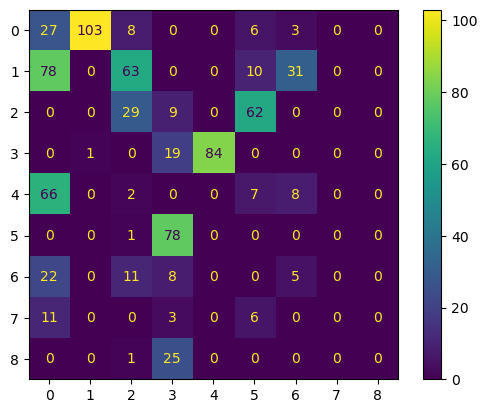

In [75]:
disp.plot()

# *Next Steps*

1. Evaluate across arms, repeat above three processes for fluid data - reduce communities so there are equal labels?
2. merge in functional topography metrics to dataframe containing sub-id and community assignments, then rerun xgboost predictions of communities using those metrics as the train/test set
3. 